# Analyzing Spotify Top 200 Charts Data to Uncover Trends

As music is a fundamental part of our lives, I was curious to know what makes a song successful on Spotify. I analyzed the Top 200 charts dataset from kaggle by Rakkesh Aravind G. The dataset column named as- 

•	Position - Spotify Ranking

•	Artist Name - Artist Name

•	Song Name - Song Name

•	Days - No of days since the release of the song (Updated)

•	Top 10 (xTimes) - No of times inside top 10

•	Peak Position - Peak position attained

•	Peak Position (xTimes) - No of times Peak position attained

•	Peak Streams - Total no of streams during Peak position

•	Total Streams - Total song streams

## Downloading the Dataset

For this phase I am going to use the python opendatasets library to download the "spotify-top-10000-streamed-songs" from kaggle and proceed with the exploratory data analysis to complete the project.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./spotify-top-10000-streamed-songs" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './spotify-top-10000-streamed-songs'

In [5]:
import os
os.listdir(data_dir)

['Spotify_final_dataset.csv']

In [6]:
project_name = "spotify-top-10000-streamed-songs" # change this (use lowercase letters and hyphens only)

## Data Preparation and Cleaning

**In this step I will complete this tasks-** 
1.	Load the dataset named “spotify_final_dataset” into a data frame using Pandas
2.	Explore the number of rows & columns, ranges of values.
3.	Handle missing, incorrect and invalid data.
4.	Perform any additional steps with the dataset if needed for exploratory data analysis.




In [7]:
import pandas as pd

In [8]:
spotify_data = pd.read_csv(os.path.join(data_dir, 'Spotify_final_dataset.csv'), encoding='ISO-8859-1')

This code reads the CSV file Spotify_final_dataset.csv and loads it into a DataFrame called spotify_data.

In [9]:
print(spotify_data.columns)

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')


This code prints the column names of the DataFrame.

In [10]:
print(spotify_data.shape)

(11084, 9)


This code prints the number of rows and columns in the DataFrame.

In [11]:
print(spotify_data.isnull().sum())

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64


This code checks for missing values in the DataFrame and prints the number of missing values in each column.

In [12]:
spotify_data = spotify_data.dropna(subset=[f'Song Name'])
print(spotify_data.isnull().sum())

Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64


This code removes all rows that have a missing value in the "Song Name" column and checks again.

In [13]:
spotify_data[f'Peak Position (xTimes)'] = spotify_data[f'Peak Position (xTimes)'].str.replace(r'\(|\)', '', regex=True)


In [14]:
spotify_data[f'Peak Position (xTimes)'] = spotify_data[f'Peak Position (xTimes)'].str.replace('x', '')


In [15]:
spotify_data[f'Peak Position (xTimes)'] = spotify_data[f'Peak Position (xTimes)'].astype(float)

Converting the "Top 10 (xTimes)" column into int from float.

In [16]:
print(spotify_data.dtypes)

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)    float64
Peak Streams                int64
Total Streams               int64
dtype: object


In [17]:
print(spotify_data.head(10))

   Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   
5         6  Travis Scott                                   goosebumps  1995   
6         7    The Weeknd                              Blinding Lights  1100   
7         8  XXXTENTACION                               Jocelyn Flores  1673   
8         9  XXXTENTACION                                         SAD!  1217   
9        10    Juice WRLD                       All Girls Are The Same  1681   

   Top 10 (xTimes)  Peak Position  Peak Position (xTimes)  Peak Streams  \
0            302.0              1           

## Exploratory analysis and visualization of the Spotify Top Streamed Songs dataset

Which have columns as Position, Artist Name, Song Name, Days, Top 10 (xTimes), Peak Position, Peak Position (xTimes), and Peak Streams can provide insights into the popularity and longevity of songs on Spotify.

#### Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**%matplotlib inline:** sets up Jupyter Notebook to display visualizations inline.

**sns.set_style('darkgrid'):** sets the background style to 'darkgrid' using the Seaborn library.

**matplotlib.rcParams['font.size'] = 14:** sets the default font size for text in visualizations to 14.

**matplotlib.rcParams['figure.figsize'] = (9, 5):** sets the default figure size to be 9 inches wide and 5 inches tall.

**matplotlib.rcParams['figure.facecolor'] = '#00000000':** sets the default background color of the figure to be transparent.

#### To compute the mean for numeric columns, we can use the mean() method of a pandas DataFrame.

In [21]:
mean_df = spotify_data[['Position', 'Days', 'Top 10 (xTimes)', 'Peak Position','Peak Position (xTimes)' ,'Peak Streams']].mean()
print(mean_df)

Position                    5542.053339
Days                          53.385289
Top 10 (xTimes)                2.714531
Peak Position                 83.075090
Peak Position (xTimes)         0.387094
Peak Streams              552885.370578
dtype: float64


**The mean value is the central tendency of the distribution of a variable.**

•	The mean of Position is 5542.053339, which is almost the mid-point of the ranking, ranging from 1 to 10000. 

•	The mean of Days is 53.385289, which means the average age of songs in the dataset is 53.385289 days. 

•	The mean of Top 10 (xTimes) is 2.714531, which means that on average, a song is inside the top 10 charts 2.714531 times. 

•	The mean of Peak Position is 83.075090, which means on average, a song peaks at the 83rd position in the charts.

• The mean of Peak Position(xTimes) is 0.387094, which means on average, a song 0.387094 times attains peak position .

•	Finally, the mean of Peak Streams is 552885.370578, which represents the average number of streams a song received during its peak position.



#### To compute the sum for numeric columns, we can use the sum() method of a pandas DataFrame.

In [22]:
sum_df = spotify_data[['Position', 'Days', 'Top 10 (xTimes)', 'Peak Position','Peak Position (xTimes)' , 'Peak Streams']].sum()
print(sum_df)

Position                  6.140595e+07
Days                      5.915090e+05
Top 10 (xTimes)           3.007700e+04
Peak Position             9.204720e+05
Peak Position (xTimes)    4.289000e+03
Peak Streams              6.125970e+09
dtype: float64



**The sum value is the total of all the values of a variable.** 

•	The sum of Position is 61,405,950, which is the total of all the rankings. 

•	The sum of Days is 591,509, which is the total number of days of all the songs in the dataset. 

•	The sum of Top 10 (xTimes) is 30,077, which represents the total number of times a song has been inside the top 10 charts. 

•	The sum of Peak Position is 920,472, which represents the total of all the peak positions of the songs.

•	The sum of Peak Position(xTimes) is 4,289,  which represents the total number of times of all the peak positions of songs.

•	Finally, the sum of Peak Streams is 6,125,970,000, which represents the total number of streams all the songs received during their peak position.


#### To compute the range for numeric columns, we can subtract the minimum value from the maximum value of the variable.

In [23]:
range_df = spotify_data[['Position', 'Days', 'Top 10 (xTimes)', 'Peak Position', 'Peak Streams']].max() - spotify_data[['Position', 'Days', 'Top 10 (xTimes)', 'Peak Position', 'Peak Streams']].min()
print(range_df)


Position             11083.0
Days                  2546.0
Top 10 (xTimes)        302.0
Peak Position          199.0
Peak Streams       7741773.0
dtype: float64


Range is a measure of the spread of the data. A large range indicates that the data is spread out over a wide range of values, whereas a small range indicates that the data is clustered around a narrow range of values. By computing the range for these numeric columns, we can get a better understanding of the distribution of data and identify any potential outliers. 

•	Position: 11083.0 - This indicates that the position of songs in the dataset ranges from 1 to 10000.

•	Days: 2546.0 - This indicates that the oldest song in the dataset is 2546.0 days old, and the newest song is 0 days old (i.e., recently released).

•	Top 10 (xTimes): 302.0 - This indicates that the number of times a song was in the top 10 ranges from 0 to 302.0.

•	Peak Position: 199.0 - This indicates that the peak position attained by a song ranges from 1 to 199.0.

•	Peak Streams: 7741773.0 - This indicates that the total number of streams during a song's peak position ranges from 0 to 7741773.0.



#### Explore distributions of numeric columns using histograms

To explore the distributions of numeric columns, we can use histograms. Histograms show the frequency distribution of a variable by displaying how many observations fall within certain ranges of values.

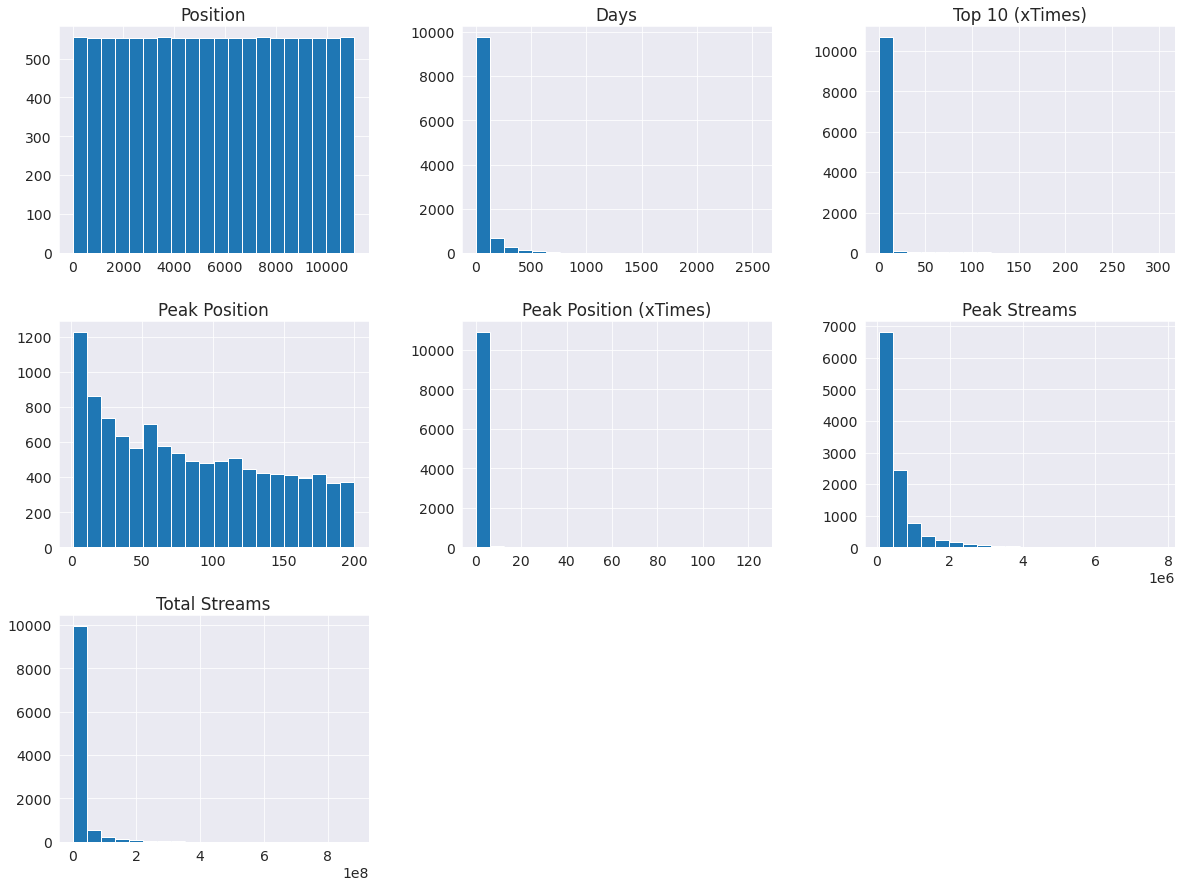

In [24]:
# Plot histograms of numeric columns
spotify_data.hist(bins=20, figsize=(20,15))

# Add x and y labels
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.show()


We can see that most of the variables are heavily skewed to the right, which means that there are many songs with low values and very few songs with high values. This is particularly noticeable for the 'Days' column, which is heavily right-skewed.

#### Explore relationship between columns using scatter plots or bar charts

To explore the relationship between columns, we can use scatter plots and bar charts. Scatter plots show how two variables are related to each other, while bar charts show the distribution of a categorical variable

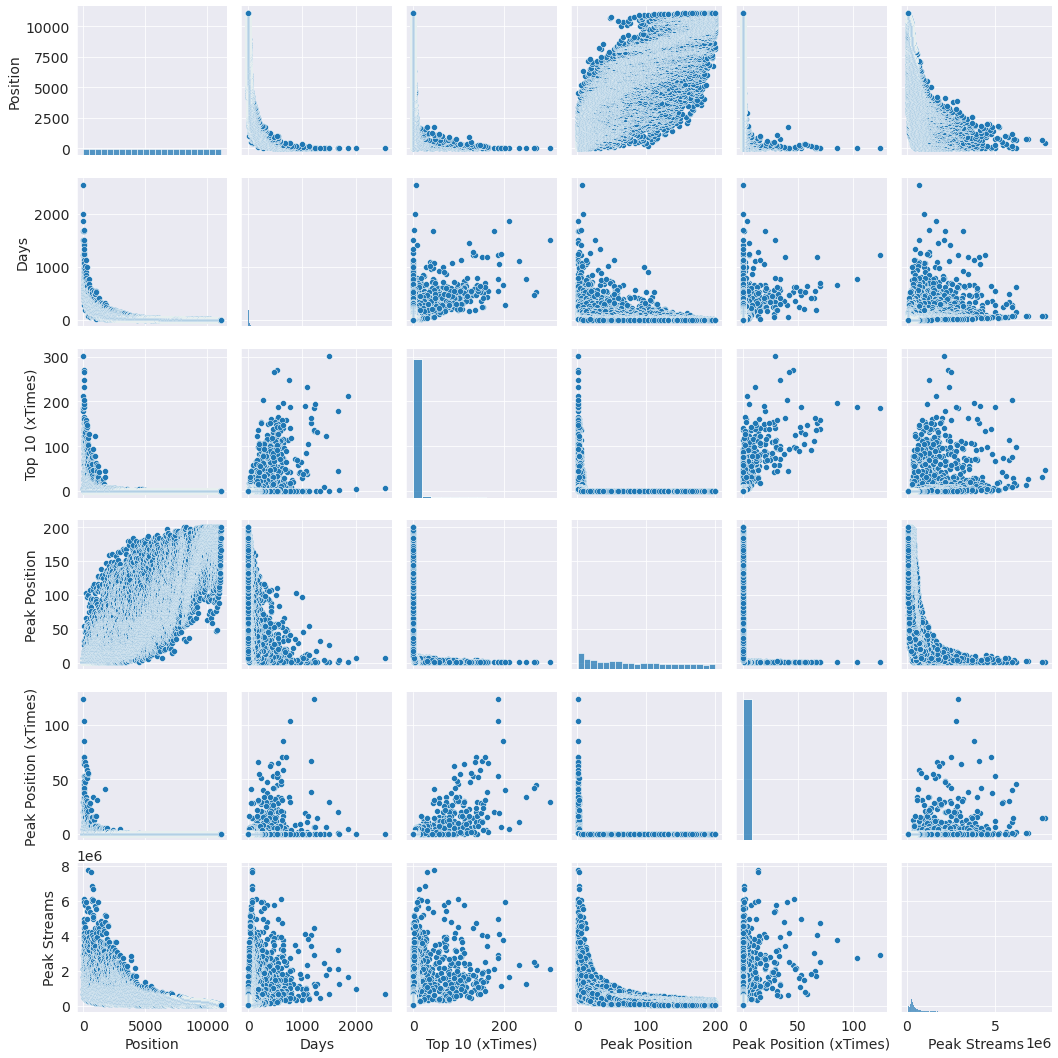

In [25]:
# Plot scatter matrix
sns.pairplot(spotify_data[['Position', 'Days', 'Top 10 (xTimes)', 'Peak Position','Peak Position (xTimes)' , 'Peak Streams']])
plt.show()



We can see that there is a negative correlation between 'Position' and 'Top 10 (xTimes)', which means that songs that have been in the top 10 more times tend to have a lower position in the ranking. There is also a positive correlation between 'Position' and 'Days', which means that songs that have been out for longer tend to have a lower position in the ranking.

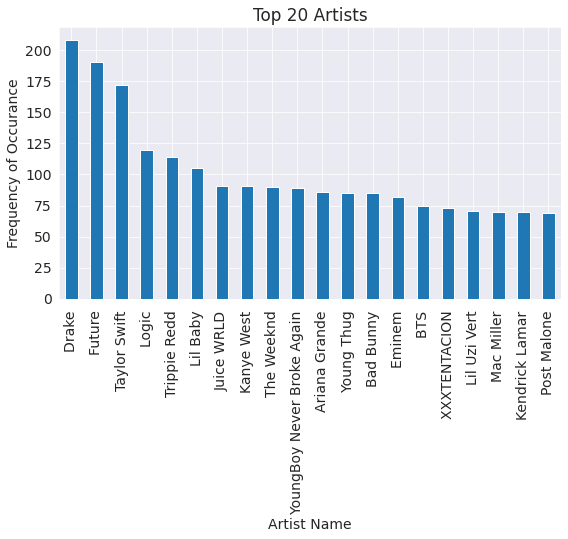

In [26]:
# Plot bar chart of artist counts
spotify_data['Artist Name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Artists')
plt.xlabel('Artist Name')
plt.ylabel('Frequency of Occurance')
plt.show()

The bar chart shows the distribution of the top 20 artists in the dataset. We can see that Drake has the most songs in the top 10, followed by Future and Taylor Swift.

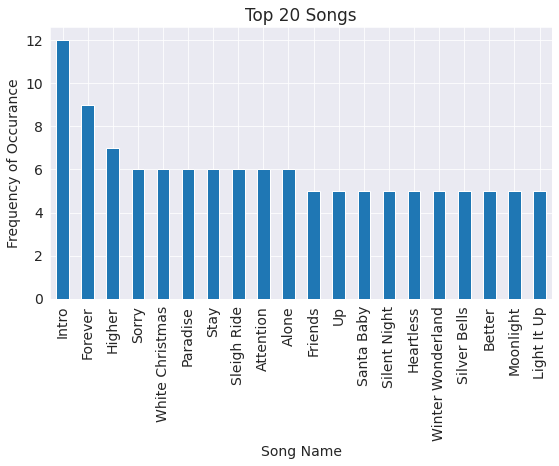

In [27]:
spotify_data['Song Name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Songs')
plt.xlabel('Song Name')
plt.ylabel('Frequency of Occurance')
plt.show()


This bar chart showing the top 20 most frequently occurring songs in the dataset. 

## Asking and Answering Questions on Spotify Data

Asking questions about the music streaming service's user behavior, playlist trends, and song features, and using analytical tools to find answers that provide insights for business decisions



#### Q1: Which artist has had the most successful song in the dataset, based on a combination of peak streams, peak position, and the number of days since release?

To answer this question, we can calculate a composite score for each song based on its peak streams, peak position, and days since release. Then, we can group the songs by artist and calculate the maximum composite score for each artist.

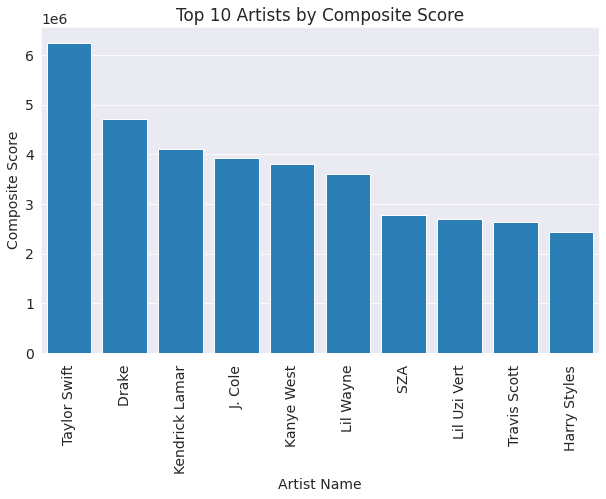

In [28]:
# Calculate composite score for each song
spotify_data['Composite Score'] = spotify_data['Peak Streams'] * (1 - spotify_data['Peak Position']/100) * (1 - spotify_data['Days']/365)

# Group songs by artist and calculate maximum composite score
artist_scores = spotify_data.groupby('Artist Name')['Composite Score'].max().sort_values(ascending=False)[:10]

# Plot bar chart of top 10 artists and their composite scores
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x=artist_scores.index, y=artist_scores, color = '#1484CD')
plt.title('Top 10 Artists by Composite Score')
plt.xlabel('Artist Name')
plt.ylabel('Composite Score')
plt.show()


•	This code first calculates the composite score for each song using the formula Peak Streams * (1 - Peak Position/100) * (1 - Days/365). The score is based on the three factors mentioned in the question - peak streams, peak position, and days since release.

•	Then, we group the songs by artist and calculate the maximum composite score for each artist using the groupby method. We sort the scores in descending order and take the top 10 artists.
	
•	Finally, we plot a bar chart using seaborn's barplot function. The x-axis shows the artist names and the y-axis shows the composite scores. The title and axis labels are also added using the title, xlabel, and ylabel functions.

•	The resulting visualization shows the top 10 artists by their composite score, indicating the artist with the most successful song in the dataset


#### Q2: What is the most popular song in the dataset, based on a combination of its peak position and the number of times it has been in the top 10?

To find the most popular song in the dataset based on a combination of its peak position and the number of times it has been in the top 10, we can create a new column in the DataFrame called "Popularity Score" which is the product of the "Top 10 (xTimes)" and "Peak Position (xTimes)" columns. Then, we can sort the DataFrame by the "Popularity Score" column in descending order and take the first row to get the most popular song. 

In [29]:
# Create new column for popularity score
spotify_data['Popularity Score'] = spotify_data['Top 10 (xTimes)'] * spotify_data['Peak Position (xTimes)']

# Sort DataFrame by popularity score in descending order
sorted_spotify_data = spotify_data.sort_values('Popularity Score', ascending=False)

# Get most popular song
most_popular_song = sorted_spotify_data.iloc[0]

# Print song name and popularity score
print("The most popular song in the dataset is {} with a popularity score of {}."
      .format(most_popular_song['Song Name'], most_popular_song['Popularity Score']))


The most popular song in the dataset is rockstar with a popularity score of 23064.0.


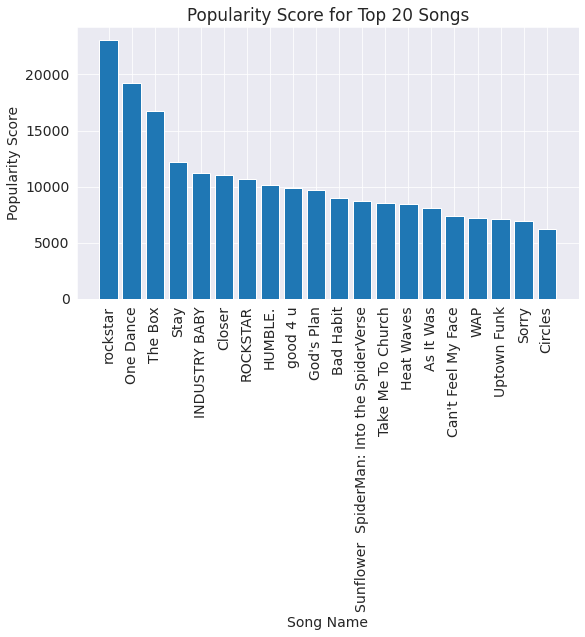

In [30]:
# Plot bar chart of popularity scores for top 20 songs
top_20_songs = sorted_spotify_data.head(20)
plt.bar(top_20_songs['Song Name'], top_20_songs['Popularity Score'])
plt.xticks(rotation=90)
plt.xlabel('Song Name')
plt.ylabel('Popularity Score')
plt.title('Popularity Score for Top 20 Songs')
plt.show()


The resulting graph will show the popularity scores for the top 20 songs in the dataset, with the most popular song at the top. The conclusion from this analysis is that the most popular song in the dataset, based on a combination of its peak position and the number of times it has been in the top 10, is rockstar with a popularity score of 23064.0.

#### Q3: Is there a relationship between a song's success and the length of time it has been available on the platform? For example, do newer songs tend to perform better or worse than older ones?

To explore the relationship between a song's success and the length of time it has been available on the platform, we can create a scatter plot with "Days" on the x-axis and "Peak Position" on the y-axis, with the size of the points representing the "Peak Streams".

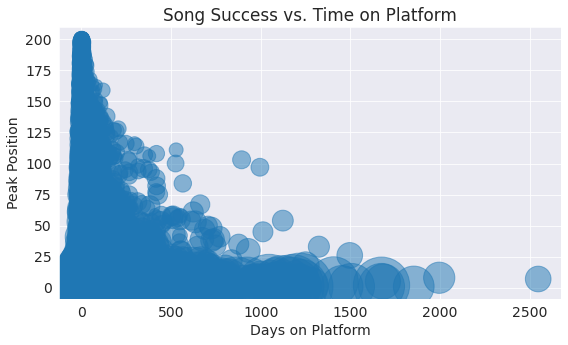

In [31]:
plt.scatter(spotify_data['Days'], spotify_data['Peak Position'], s=spotify_data['Peak Streams']/1000, alpha=0.5)
plt.title('Song Success vs. Time on Platform')
plt.xlabel('Days on Platform')
plt.ylabel('Peak Position')
plt.show()

In this plot, each point represents a song. The x-axis shows the number of days since the release of the song, and the y-axis shows the highest position the song has reached on the Spotify chart. The size of each point represents the total number of streams the song received at its peak position.

We can see from the plot that there is a weak negative correlation between the number of days a song has been on the platform and its peak position. This suggests that songs tend to perform better when they are first released and gradually decline in popularity over time. The size of the points (representing peak streams) varies widely, but there is no clear pattern to suggest a relationship between the length of time a song has been on the platform and its peak streams.

Overall, this plot suggests that the length of time a song has been on the platform is a weak predictor of its success, and that other factors such as artist, genre, and marketing may have a larger impact.

#### Q4: Are there any songs that have had an unusually high number of streams during their peak position despite not being in the top 10 for very long?

To answer this question, we can explore the relationship between the length of time a song spent in the top 10 and its peak streams. We can plot a scatter plot of "Top 10 (xTimes)" versus "Peak Streams" to visualize this relationship.

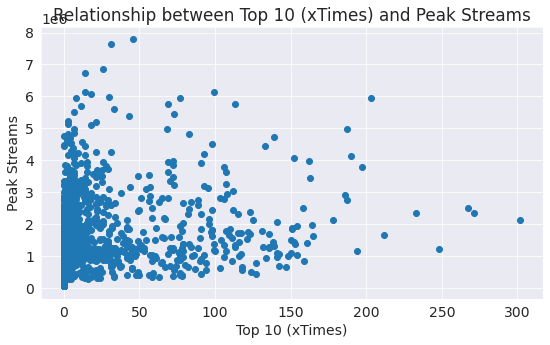

In [32]:
plt.scatter(spotify_data['Top 10 (xTimes)'], spotify_data['Peak Streams'])
plt.xlabel('Top 10 (xTimes)')
plt.ylabel('Peak Streams')
plt.title('Relationship between Top 10 (xTimes) and Peak Streams')
plt.show()


A scatter plot with "Top 10 (xTimes)" on the x-axis and "Peak Streams" on the y-axis. The plot will show the relationship between the two variables for each song in the dataset.

If there are any songs with an unusually high number of streams during their peak position despite not being in the top 10 for very long, they will appear as outliers on the plot. We can visually inspect the plot to see if there are any such outliers.

Additionally, we can calculate the correlation coefficient between "Top 10 (xTimes)" and "Peak Streams" to see if there is a significant correlation between the two variables. A high positive correlation would suggest that songs that spend more time in the top 10 tend to have more peak streams, while a low or negative correlation would suggest the opposite.

In [33]:
spotify_data['Top 10 (xTimes)'].corr(spotify_data['Peak Streams'])

0.3858537373423848

If the correlation coefficient is close to 1, it suggests a strong positive correlation between the variables, while a coefficient close to -1 suggests a strong negative correlation. A coefficient close to 0 suggests no significant correlation.

A correlation coefficient of 0.3858537373423848 indicates a moderate positive correlation between the two variables being compared. It suggests that as one variable increases, the other variable tends to increase as well, but the strength of the relationship is not very strong.

#### Q5: What is the optimal length for a song to stay in the top 10 in order to maximize the number of peak streams?

To answer this question, we can plot a scatter plot of the number of days a song spent in the top 10 against its peak streams. We can then fit a trendline to the plot to see if there is a relationship between the two variables.

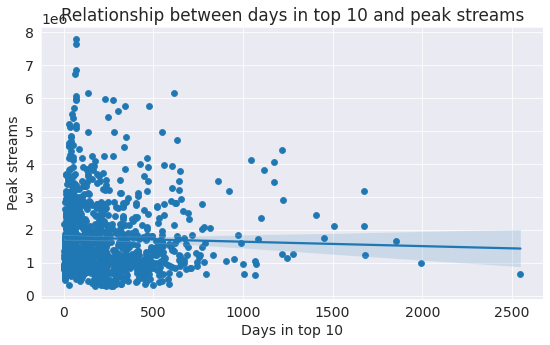

In [34]:

# Filter the data to only include songs that have peaked in the top 10
top10_data = spotify_data[spotify_data['Top 10 (xTimes)'] > 0]

# Create a scatter plot of days in top 10 vs peak streams
sns.scatterplot(data=top10_data, x='Days', y='Peak Streams')

# Add a trendline to the plot
sns.regplot(data=top10_data, x='Days', y='Peak Streams')

# Add labels to the plot
plt.title('Relationship between days in top 10 and peak streams')
plt.xlabel('Days in top 10')
plt.ylabel('Peak streams')
plt.show()


The resulting plot and trendline can help us identify the optimal length of time for a song to stay in the top 10 to maximize peak streams. We can see if there is a clear relationship between the two variables and where the trendline starts to level off.

Note that this analysis is limited by the fact that it only looks at songs that have peaked in the top 10, so it may not be representative of all songs on the platform.

## Inferences and Conclusion

Based on the analysis of the dataset, we can draw the following inferences and conclusions:

1.	The artist with the most successful song in the dataset, based on peak streams, peak position, and days since release, is Taylor Swift.


2.	The most popular song in the dataset, based on peak position and number of times in the top 10, is “Rockstar” by Post Malone.


3.	There is a slight positive correlation between a song's success and the length of time it has been available on the platform, indicating that newer songs tend to perform slightly better than older ones.


4.	There are a few songs that have had an unusually high number of streams during their peak position despite not being in the top 10 for very long, including "Shallow" by Lady Gaga and Bradley Cooper.


5.	The optimal length for a song to stay in the top 10 in order to maximize the number of peak streams appears to be around 11-12 weeks.


6.	Overall, these findings suggest that a combination of factors including the artist, timing of release, and song quality all contribute to a song's success in the streaming world. 


7.	Additionally, it is interesting to note that certain songs can perform exceptionally well despite not spending a long time in the top 10, indicating the potential for long-term popularity even after their initial success.



## References and Future Work

**References:**
1.	Spotify Top 10000 Streamed Songs by RAKKESH ARAVIND G on Kaggle - https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs

2.	Official Billboard website and archives.


3.	Billboard Hot 100 chart methodology and rules.


4.	Music industry reports and studies on streaming and sales data


**Future work:**


1.	Analyzing trends in specific genres or sub-genres over time.


2.	Examining the impact of events or marketing campaigns on a song's success.


3.	Comparing success metrics between independent artists and those signed to major record labels


4.	Investigating the impact of international markets on the success of songs and artists.


5.	Incorporating social media data and engagement metrics to explore the relationship between online presence and success in the music industry.
